## 1. Multicollinearity

Create Matrix X

In [208]:
import numpy as np
from numpy import random as rd
from numpy.linalg import det, inv
import pandas as pd
import pandas as pd
import pyreadr

In [209]:
np.random.seed(12345676)
n = 10   ####

#Create a matrix 10x10 

A = np.zeros((10,10))

In [210]:
##### 9 vectors (columns) follow a normal distribution.

for i in range(A.shape[0] -1): #####shape[0] gives number of rows and -1 eliminates 1 row
 A[:, i] = np.random.normal(0, 1, 10)   

In [211]:
#####The 10th vector is a linear combination of tree vectors.
A[:, 9] = A[:, 1] + A[:, 2]+ A[:, 3]

In [212]:
#####Try to find the inverse of this matrix and show what is the output you get in both R and Python.
A_inversa = np.linalg.inv(A)
print(A_inversa)

[[-1.32053415e-01  1.76275928e-01 -2.37616999e-01  1.02436989e+00
  -1.33979831e-01 -1.19597287e+00 -3.26102761e-01  6.81508377e-01
  -9.21057208e-02 -3.11491632e+00]
 [-2.37192537e+15  7.75324009e+13  2.67964671e+15 -3.12586833e+15
  -2.50501911e+15  2.10985352e+15 -1.06200405e+15 -2.98183156e+15
  -7.68742327e+14  8.08039833e+15]
 [-2.37192537e+15  7.75324009e+13  2.67964671e+15 -3.12586833e+15
  -2.50501911e+15  2.10985352e+15 -1.06200405e+15 -2.98183156e+15
  -7.68742327e+14  8.08039833e+15]
 [-2.37192537e+15  7.75324009e+13  2.67964671e+15 -3.12586833e+15
  -2.50501911e+15  2.10985352e+15 -1.06200405e+15 -2.98183156e+15
  -7.68742327e+14  8.08039833e+15]
 [ 4.73287186e-02  3.22574270e-01  2.31682942e-01 -1.99000574e-01
  -2.29989792e-01  5.24331002e-01  7.02758149e-02 -9.41737371e-02
   1.12791690e-01  1.15297474e+00]
 [-4.61339012e-01  7.41915368e-02  2.61834594e-01 -8.83665952e-01
  -8.77158528e-01  6.68417441e-01 -3.45469535e-01 -8.71689254e-01
  -5.03934910e-01  1.81279989e+00

# Explain why you get different results.

Since column 10 is a linear combination of three other columns of the matrix, then we conclude that our matrix is singular. Furthermore, we know that a singular matrix has no determinant, so we cannot obtain its inverse.

## 2. Analyzing RCT data with Precision Adjustment

## Data

In this lab, we analyze the Pennsylvania re-employment bonus experiment, which was previously studied in "Sequential testing of duration data: the case of the Pennsylvania ‘reemployment bonus’ experiment" (Bilias, 2000), among others. These experiments were conducted in the 1980s by the U.S. Department of Labor to test the incentive effects of alternative compensation schemes for unemployment insurance (UI). In these experiments, UI claimants were randomly assigned either to a control group or one of five treatment groups. Actually, there are six treatment groups in the experiments. Here we focus on treatment group 4, but feel free to explore other treatment groups. In the control group the current rules of the UI applied. Individuals in the treatment groups were offered a cash bonus if they found a job within some pre-specified period of time (qualification period), provided that the job was retained for a specified duration. The treatments differed in the level of the bonus, the length of the qualification period, and whether the bonus was declining over time in the qualification period; see http://qed.econ.queensu.ca/jae/2000-v15.6/bilias/readme.b.txt for further details on data. 
  

In [213]:
!pip install pyreadr

In [214]:
import pandas as pd
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
## loading the data
Penn = pd.read_csv("../../data/penn_jae.dat" , sep='\s', engine='python')
n = Penn.shape[0]
p_1 = Penn.shape[1]

##Focus on the Treatment group 2
Penn = Penn[ (Penn['tg'] == 2) | (Penn['tg'] == 0) ]

In [216]:
Penn.shape

(5782, 24)

In [217]:
Penn.head()

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,NaN
1,10635,2,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,NaN
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
9,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN


In [218]:
#this columns were not dropped out :  Unnamed: 13, recall
Penn.columns
Penn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 13911
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   abdt         5782 non-null   int64  
 1   tg           5782 non-null   int64  
 2   inuidur1     5782 non-null   int64  
 3   inuidur2     5782 non-null   int64  
 4   female       5782 non-null   int64  
 5   black        5782 non-null   int64  
 6   hispanic     5782 non-null   int64  
 7   othrace      5782 non-null   int64  
 8   dep          5782 non-null   int64  
 9   q1           5782 non-null   int64  
 10  q2           5782 non-null   int64  
 11  q3           5782 non-null   int64  
 12  q4           5782 non-null   int64  
 13  Unnamed: 13  5782 non-null   int64  
 14  q5           5782 non-null   int64  
 15  q6           5782 non-null   int64  
 16  recall       5782 non-null   int64  
 17  agelt35      5782 non-null   int64  
 18  agegt54      5782 non-null   int64  
 19  durab

C:\Users\acoap\Estadistica\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='inuidur1', ylabel='Density'>

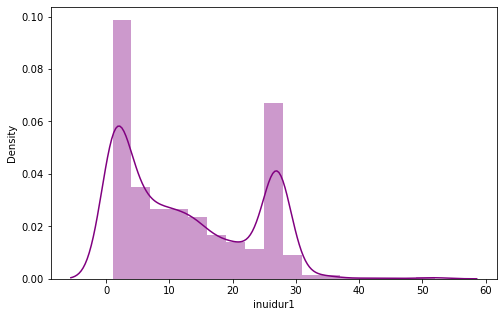

In [219]:
#Plotting the inuidur1 variable for the tg=2 group
fig, ax = plt.subplots(figsize=(8, 5))

sns.distplot(Penn[(Penn['tg'] == 2)].inuidur1, color='purple')


C:\Users\acoap\Estadistica\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='inuidur1', ylabel='Density'>

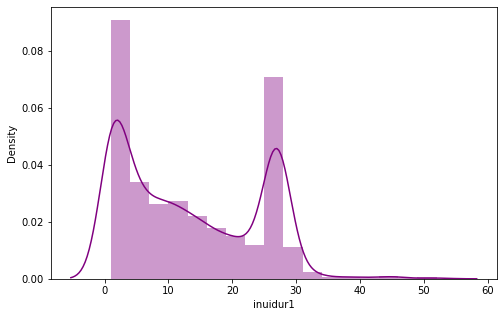

In [220]:
#Plotting the inuidur1 variable for the tg=0 group
fig, ax = plt.subplots(figsize=(8, 5))

sns.distplot(Penn[(Penn['tg'] == 0)].inuidur1, color='purple')

It can be seen that the distribution of the control group and the treatment group is similar.

In [221]:
# Dependent variable
Penn['T2'] = (Penn[['tg']]==2).astype(int)

# Create category variable
Penn['dep'] = Penn['dep'].astype( 'category' )
Penn.head()

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,T2
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,NaN,0
1,10635,2,7,3,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,NaN,1
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
9,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,1


In [222]:
Penn['dep'].unique()

[2, 0, 1]
Categories (3, int64): [0, 1, 2]

### Model 
To evaluate the impact of the treatments on unemployment duration, we consider the linear regression model:

$$
Y =  D \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$

where $Y$ is  the  log of duration of unemployment, $D$ is a treatment  indicators,  and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation.   Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously.


We also consider interactive regression model:

$$
Y =  D \alpha_1 + D W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W', DW')' = 0,
$$
where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

Under RCT, the projection coefficient $\beta_1$ has
the interpretation of the causal effect of the treatment on
the average outcome. We thus refer to $\beta_1$ as the average
treatment effect (ATE). Note that the covariates, here are
independent of the treatment $D$, so we can identify $\beta_1$ by
just linear regression of $Y$ on $D$, without adding covariates.
However we do add covariates in an effort to improve the
precision of our estimates of the average treatment effect.

- Run all specifications:
    * classical 2-sample approach, no adjustment (CL)
    * classical linear regression adjustment (CRA)
    * interactive regression adjustment (IRA)
    * interactive regression adjustment (IRA) using Lasso

# Carry out covariate balance check

This is done using "lm_robust" command which unlike "lm" in the base command automatically does the correct Eicher-Huber-White standard errors, instead othe classical non-robus formula based on the homoscdedasticity command.

In [223]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import numpy as np

In [224]:
## Regress  on all covariates

In [225]:
y = Penn[['T2']].reset_index( drop = True )

In [226]:
# Get data from R
result = pyreadr.read_r('../../data/m_reg.RData')
X_vars = result['X1']

In [227]:
model = "T2~(female+black+othrace+C(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2"
model_results = smf.ols( model, data=Penn ).fit().get_robustcov_results(cov_type = "HC1")

print(model_results.summary())
print( "Number of regressors in the basic model:",len(model_results.params), '\n')

                            OLS Regression Results                            
Dep. Variable:                     T2   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.748
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           5.79e-51
Time:                        01:19:30   Log-Likelihood:                -4065.8
No. Observations:                5782   AIC:                             8352.
Df Residuals:                    5672   BIC:                             9084.
Df Model:                         109                                         
Covariance Type:                  HC1                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5090    

C:\Users\acoap\Estadistica\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 119, but rank is 108
  warnings.warn('covariance of constraints does not have full '


We see that that even though this is a randomized experiment, balance conditions are failed.

# Model Specification

## 1. classical 2-sample approach, no adjustment (CL)

In [238]:
# model specifications
# take log of inuidur1
Penn["log_inuidur1"] = np.log( Penn["inuidur1"] ) 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] ) ).reset_index( drop = True )

# no adjustment (2-sample approach)
formula_cl = 'log_inuidur1 ~ T2'

# adding controls
# Omitted dummies: q1, nondurable, muld

ols_cl = smf.ols( formula = formula_cl, data = Penn ).fit().get_robustcov_results(cov_type = "HC1")




# Results 
print(ols_cl.summary())

                            OLS Regression Results                            
Dep. Variable:           log_inuidur1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.879
Date:                Fri, 29 Apr 2022   Prob (F-statistic):             0.0154
Time:                        01:27:09   Log-Likelihood:                -9344.7
No. Observations:                5782   AIC:                         1.869e+04
Df Residuals:                    5780   BIC:                         1.871e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0568      0.021     98.158      0.0

## 2. classical linear regression adjustment (CRA)

In [267]:
#getting data7
# Get data from R
result = pyreadr.read_r('../../data/ols_cra_reg.RData')
x_vars_cra = result['X1']

formula_cra = 'log_inuidur1 ~ T2 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2'

ols_cra = sm.OLS( list(log_inuidur1), list(x_vars_cra) ).fit().get_robustcov_results(cov_type = "HC1")
print(ols_cra.summary())

TypeError: cannot perform reduce with flexible type

In [ ]:
formula_cra = 'log_inuidur1 ~ T2 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2'

ols_cra = sm.OLS( log_inuidur1, X_vars_cra ).fit().get_robustcov_results(cov_type = "HC1")
print(ols_cra.summary())

The interactive specificaiton corresponds to the approach introduced in Lin (2013).

In [ ]:
# create Y variable 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] )).reset_index( drop = True )

## 3. Interactive regression adjustment (IRA)

In [200]:
# create Y variable 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] )).reset_index( drop = True )

# Reset index to estimation
# Get data from R

formula_ira = 'T2 ~ pow(female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd,2)'

result = pyreadr.read_r('../.../data/ols_ira_reg.RData')
X_vars_ols_ira = result['S1']



PyreadrError: File b'../.../data/ols_ira_reg.RData' does not exist!

In [ ]:
#getting data7
# Get data from R
result_cra = pyreadr.read_r('../../data/ols_cra_reg.RData')
X_vars_cra = result['X1']

In [205]:
result = pyreadr.read_r('../../../../data/ols_ira_reg.RData')
X_vars_ols_ira = result['S1']

PyreadrError: File b'../../../../data/ols_ira_reg.RData' does not exist!